<a href="https://colab.research.google.com/github/jiin-son/nba/blob/main/NBA_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [61]:
!pip install optuna
import optuna

In [ ]:
from google.colab import files
uploaded = files.upload()

In [5]:
df = pd.read_csv('prep_df.csv')

In [6]:
import random
import hashlib

def md5_hash(input_string):
  """Generates an MD5 hash from a given string.
  Args:
    input_string: The string to hash.
  Returns:
    The MD5 hash as a hexadecimal string.
  """
  md5_hasher = hashlib.md5()
  md5_hasher.update(input_string.encode('utf-8'))
  return md5_hasher.hexdigest()

# Example usage
input_string = "NBA"
hashed_value = md5_hash(input_string)
print(f"The MD5 hash of '{input_string}' is: {hashed_value}")

# Convert the hexadecimal hash to an integer
try:
    number = int(hashed_value, 16)
    print(f"The integer representation of the hash is: {number}")
except ValueError:
    print("Invalid hexadecimal string")

# Set the seed value
random.seed(number)

print(f"Initial seed number: {number}")

# Generate a list of 10 random numbers
random.seed(number)
a = 0
b = 2**31-1
random_numbers = [random.randint(a, b) for _ in range(10)]

# Print the list
print("Seed", random_numbers)

The MD5 hash of 'NBA' is: 52b6d6fc82db6aef110362f4755a1fe8
The integer representation of the hash is: 109946054124266886270703940407869972456
Initial seed number: 109946054124266886270703940407869972456
Seed [1578879816, 1978497697, 1190903919, 1878057853, 1288653849, 873208946, 343223680, 1954458820, 1609495891, 882467736]


In [7]:
df

,HOME,OVERTIME,REST_DAYS,FG_PCT,FT_PCT,REB,AST,STL,BLK,TO,PF,Height_in_Inches,YEARS_IN_LEAGUE,FG_PCT_LAST_SEASON,FT_PCT_LAST_SEASON,REB_LAST_SEASON,AST_LAST_SEASON,STL_LAST_SEASON,BLK_LAST_SEASON,TOV_LAST_SEASON,PF_LAST_SEASON,TRADED_LAST_SEASON,PLAYER_AGE,TRADED_THIS_SEASON,POS_G,POS_F,POS_C,POS_FC,POS_GF,POS_CF,POS_FG,TEAM_GSW,TEAM_OKC,TEAM_CHI,TEAM_MEM,TEAM_ORL,TEAM_SAS,TEAM_DAL,TEAM_TOR,TEAM_LAC,TEAM_PHI,TEAM_SAC,TEAM_BOS,TEAM_IND,TEAM_DET,TEAM_MIL,TEAM_CLE,TEAM_WAS,TEAM_CHA,TEAM_HOU,TEAM_DEN,TEAM_PHX,TEAM_MIA,TEAM_UTA,TEAM_LAL,TEAM_POR,TEAM_MIN,TEAM_NYK,TEAM_BKN,TEAM_ATL,TEAM_NOP,W
0,0.000,0.000,2.000,0.421,1.000,3.000,3.000,1.000,1.000,3.000,2.000,78,9.000,0.499,0.703,387.000,249.000,83.000,37.000,166.000,185.000,0.000,28.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,0.000,0.000,2.000,0.412,0.833,10.000,1.000,2.000,0.000,2.000,1.000,80,8.000,0.471,0.833,601.000,364.000,75.000,43.000,188.000,145.000,0.000,26.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
2,0.000,0.000,2.000,0.500,1.000,9.000,1.000,1.000,0.000,4.000,5.000,86,10.000,0.516,0.858,409.000,115.000,42.000,111.000,89.000,156.000,0.000,29.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
3,0.000,0.000,2.000,0.308,0.500,4.000,4.000,1.000,3.000,3.000,1.000,76,8.000,0.461,0.901,310.000,377.000,74.000,87.000,112.000,152.000,0.000,30.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
4,0.000,0.000,2.000,0.167,0.000,8.000,6.000,0.000,0.000,2.000,4.000,76,16.000,0.480,0.833,373.000,333.000,61.000,53.000,124.000,108.000,0.000,34.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,1.000,0.000,0.000,0.100,0.000,4.000,4.000,0.000,0.000,1.000,2.000,73,5.000,0.468,0.821,265.000,281.000,39.000,6.000,61.000,106.000,0.000,26.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9631,1.000,0.000,0.000,0.400,0.000,5.000,1.000,0.000,0.000,0.000,2.000,79,4.000,0.446,0.895,276.000,82.000,40.000,25.000,32.000,99.000,0.000,27.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9632,1.000,0.000,0.000,0.167,0.000,7.000,2.000,0.000,0.000,0.000,1.000,79,5.000,0.434,0.440,211.000,77.000,51.000,44.000,34.000,75.000,1.000,25.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9633,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,78,2.000,0.400,0.500,20.000,5.000,5.000,1.000,3.000,11.000,0.000,20.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000


In [8]:
seed1 = random_numbers[0]

In [9]:
X = df.drop(['W'], axis = 1)
y = df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

In [11]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed1,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [ ]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-01-24 01:44:53,970] A new study created in memory with name: no-name-337ce16e-73d8-405e-82f7-528701b46e65


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-01-24 01:44:55,230] Trial 0 finished with value: 0.6829268292682927 and parameters: {'learning_rate': 0.5003268204884084, 'n_estimators': 45, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.533313929733857}. Best is trial 0 with value: 0.6829268292682927.
[I 2025-01-24 01:44:56,243] Trial 1 finished with value: 0.6569797612869746 and parameters: {'learning_rate': 0.5372861085876991, 'n_estimators': 26, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.5542065762229831}. Best is trial 0 with value: 0.6829268292682927.
[I 2025-01-24 01:44:59,613] Trial 2 finished with value: 0.6673585884795018 and parameters: {'learning_rate': 0.31537866959181493, 'n_estimators': 68, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.4007070011674474}. Best is trial 0 with value: 0.6829268292682927.
[I 2025-01-24 01:45:01,586] Trial 3 finished with value: 0.7026466009340945 

In [ ]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=12, state=1, values=[0.7093928386092372], datetime_start=datetime.datetime(2025, 1, 24, 1, 45, 18, 128613), datetime_complete=datetime.datetime(2025, 1, 24, 1, 45, 20, 799050), params={'learning_rate': 0.1180641355266149, 'n_estimators': 33, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.7327810806875493}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=12, value=None)
Best hyperparameters: {'learning_rate': 0.1180641355266149, 'n_estimators': 33, 

In [10]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.1180641355266149,
    n_estimators=33,
    max_depth=7,
    min_samples_split=8,
    min_samples_leaf=7,
    min_impurity_decrease = 0.7327810806875493,
    random_state=seed1)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

# generated for 4 different seeds, mean and median and variance (square of root)

Accuracy: 0.710
F1 Score: 0.710
Specificity: 0.697
Sensitivity: 0.744
ROC AUC: 0.710
[[650 312]
 [247 718]]


In [23]:
!pip install shap
import shap

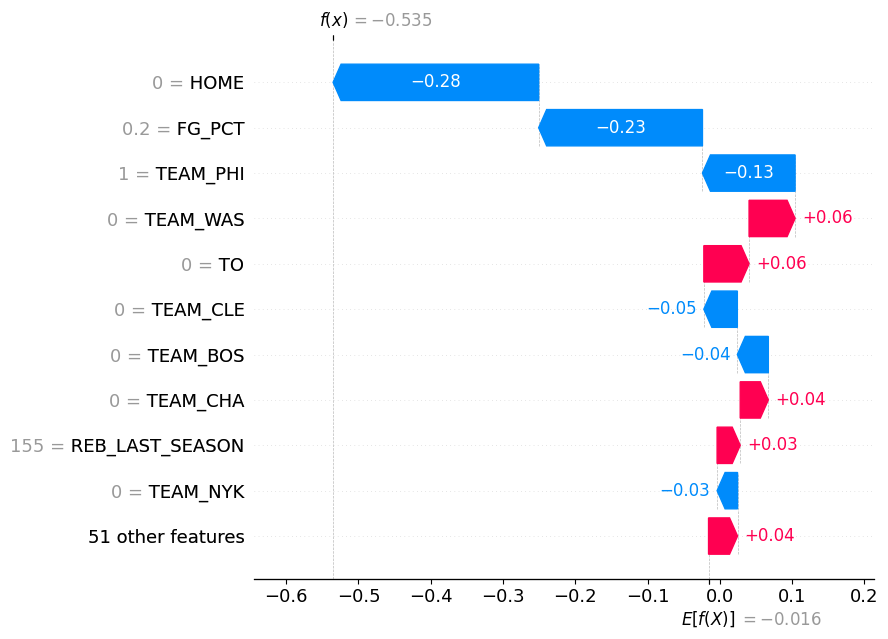

In [ ]:
# (4) Train 3 seeds and pick up 1 representative seed result to explain feature to target relationships using shap.
explainer = shap.Explainer(xg_model, X_train)
shap_values = explainer(X_test, check_additivity = False)
# which of the variables are important to the target = bare_nuclei
shap.plots.waterfall(shap_values[0], max_display = 11)

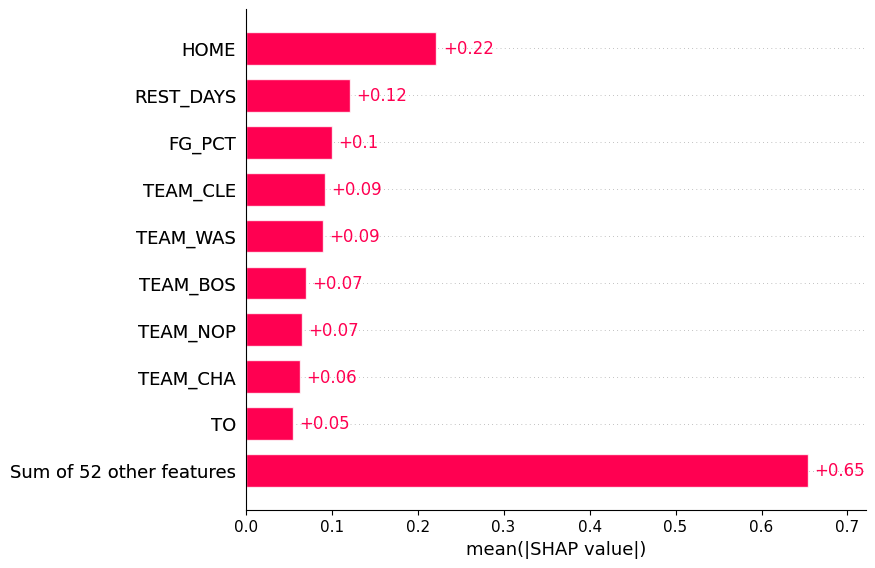

In [ ]:
shap.plots.bar(shap_values)

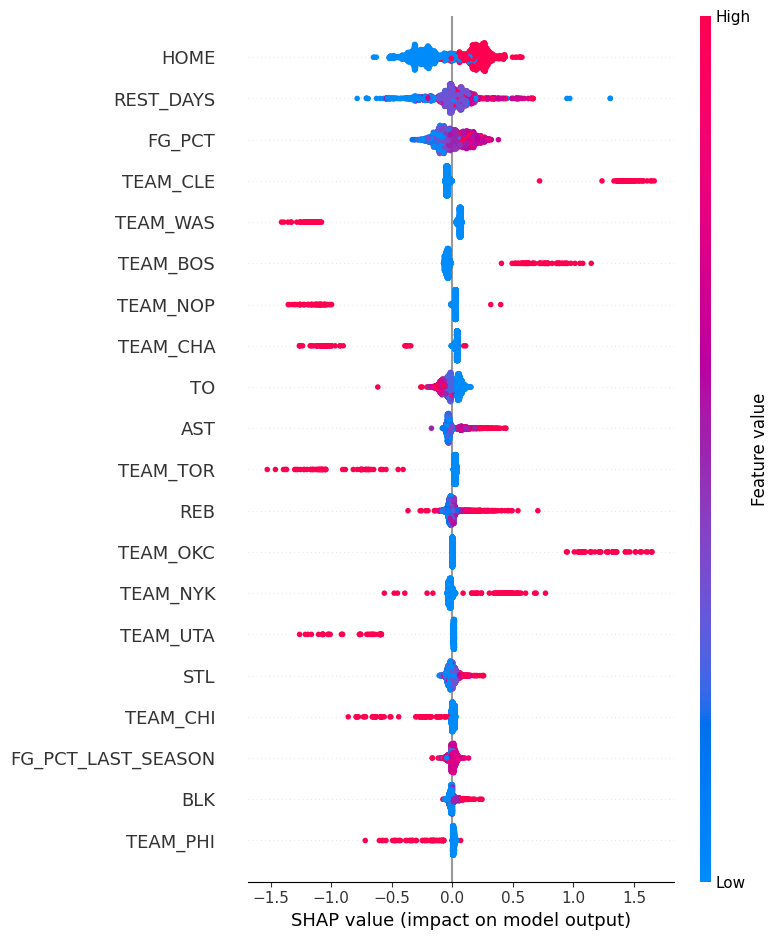

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
df.columns

Index(['HOME', 'OVERTIME', 'REST_DAYS', 'FG_PCT', 'FT_PCT', 'REB', 'AST',
       'STL', 'BLK', 'TO', 'PF', 'Height_in_Inches', 'YEARS_IN_LEAGUE',
       'FG_PCT_LAST_SEASON', 'FT_PCT_LAST_SEASON', 'REB_LAST_SEASON',
       'AST_LAST_SEASON', 'STL_LAST_SEASON', 'BLK_LAST_SEASON',
       'TOV_LAST_SEASON', 'PF_LAST_SEASON', 'TRADED_LAST_SEASON', 'PLAYER_AGE',
       'TRADED_THIS_SEASON', 'POS_G', 'POS_F', 'POS_C', 'POS_FC', 'POS_GF',
       'POS_CF', 'POS_FG', 'TEAM_GSW', 'TEAM_OKC', 'TEAM_CHI', 'TEAM_MEM',
       'TEAM_ORL', 'TEAM_SAS', 'TEAM_DAL', 'TEAM_TOR', 'TEAM_LAC', 'TEAM_PHI',
       'TEAM_SAC', 'TEAM_BOS', 'TEAM_IND', 'TEAM_DET', 'TEAM_MIL', 'TEAM_CLE',
       'TEAM_WAS', 'TEAM_CHA', 'TEAM_HOU', 'TEAM_DEN', 'TEAM_PHX', 'TEAM_MIA',
       'TEAM_UTA', 'TEAM_LAL', 'TEAM_POR', 'TEAM_MIN', 'TEAM_NYK', 'TEAM_BKN',
       'TEAM_ATL', 'TEAM_NOP', 'W'],
      dtype='object')

In [49]:
# try without the team names
sub_df = df.drop([
       'POS_G', 'POS_F', 'POS_C', 'POS_FC', 'POS_GF', 'POS_CF', 'POS_FG',
       'TEAM_GSW', 'TEAM_OKC', 'TEAM_CHI', 'TEAM_MEM',
       'TEAM_ORL', 'TEAM_SAS', 'TEAM_DAL', 'TEAM_TOR', 'TEAM_LAC', 'TEAM_PHI',
       'TEAM_SAC', 'TEAM_BOS', 'TEAM_IND', 'TEAM_DET', 'TEAM_MIL', 'TEAM_CLE',
       'TEAM_WAS', 'TEAM_CHA', 'TEAM_HOU', 'TEAM_DEN', 'TEAM_PHX', 'TEAM_MIA',
       'TEAM_UTA', 'TEAM_LAL', 'TEAM_POR', 'TEAM_MIN', 'TEAM_NYK', 'TEAM_BKN',
       'TEAM_ATL', 'TEAM_NOP'], axis = 1)
X = sub_df.drop(['W'], axis = 1)
y = sub_df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

In [13]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-05 19:15:21,142] A new study created in memory with name: no-name-af539c2f-ed4f-4e94-9d4e-bc42675af3e8


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-05 19:15:22,414] Trial 0 finished with value: 0.6024909185262065 and parameters: {'learning_rate': 0.5584292037874826, 'n_estimators': 66, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.36357750116552134}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:15:22,782] Trial 1 finished with value: 0.598858329008822 and parameters: {'learning_rate': 0.41867505532067806, 'n_estimators': 14, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.8871276005645138}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:15:23,433] Trial 2 finished with value: 0.5978204462895693 and parameters: {'learning_rate': 0.7431559450159615, 'n_estimators': 63, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.5067046846770971}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:15:24,182] Trial 3 finished with value: 0.5936689154125584 a

In [ ]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=19, state=1, values=[0.6211728074727556], datetime_start=datetime.datetime(2025, 2, 2, 4, 29, 4, 798101), datetime_complete=datetime.datetime(2025, 2, 2, 4, 29, 7, 538695), params={'learning_rate': 0.1276499220630633, 'n_estimators': 198, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.24255111080088237}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=19, value=None)
Best hyperparameters: {'learning_rate': 0.1276499220630633, 'n_estimators': 198, '

In [50]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.1276499220630633,
    n_estimators=198,
    max_depth=3,
    min_samples_split=7,
    min_samples_leaf=9,
    min_impurity_decrease = 0.24255111080088237,
    random_state=seed1)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

# generated for 4 different seeds, mean and median and variance (square of root)

Accuracy: 0.621
F1 Score: 0.627
F1 Score - Negative: 0.615
Specificity: 0.619
Sensitivity: 0.635
ROC AUC: 0.621
[[584 378]
 [352 613]]


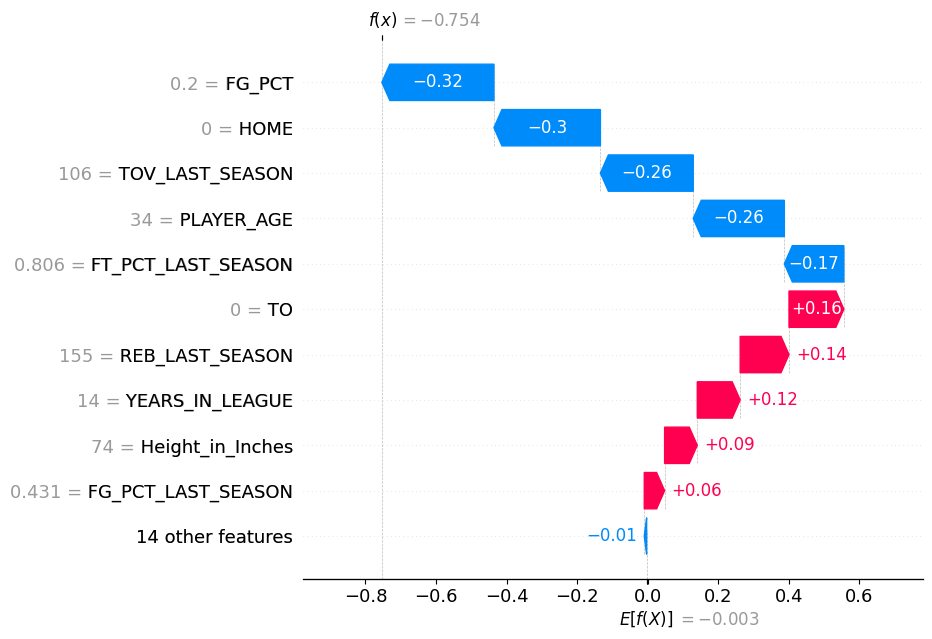

In [ ]:
# (4) Train 3 seeds and pick up 1 representative seed result to explain feature to target relationships using shap.
explainer = shap.Explainer(xg_model, X_train)
shap_values = explainer(X_test, check_additivity = False)
# which of the variables are important to the target = bare_nuclei
shap.plots.waterfall(shap_values[0], max_display = 11)

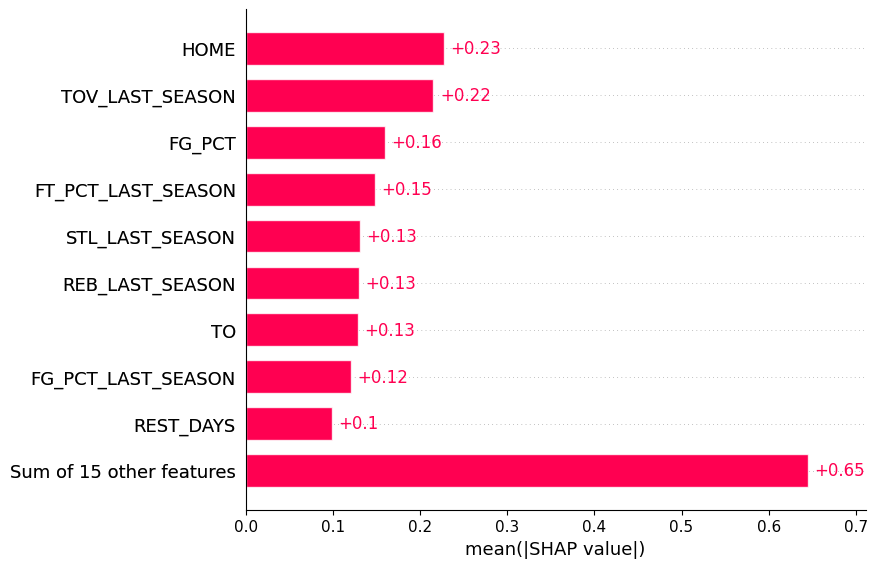

In [ ]:
shap.plots.bar(shap_values)

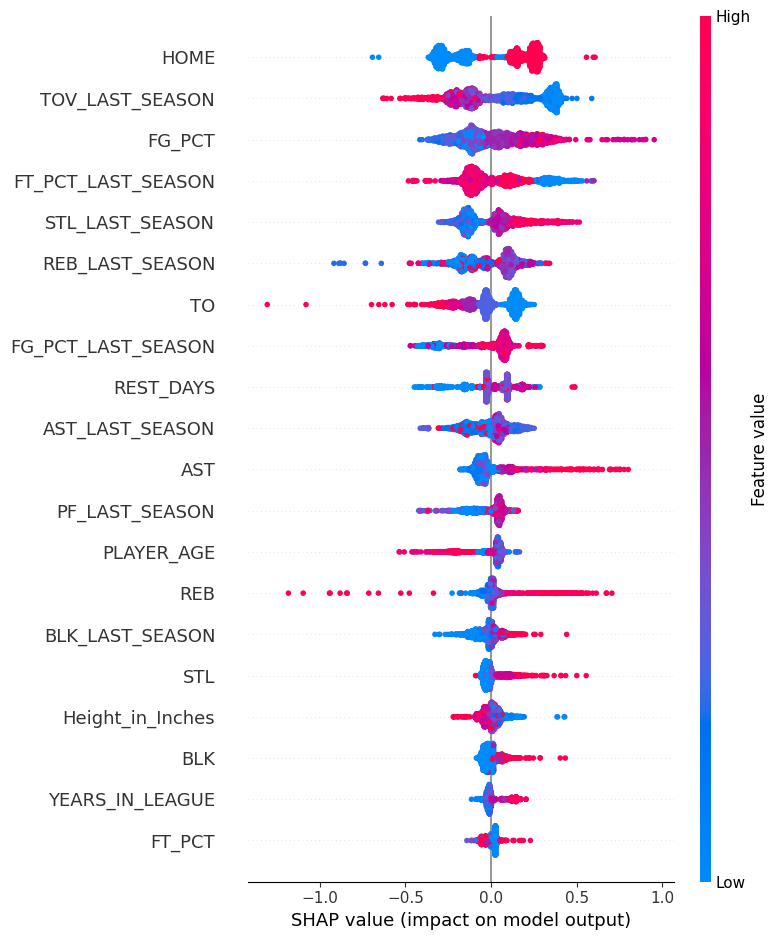

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
X_train.columns

Index(['HOME', 'OVERTIME', 'REST_DAYS', 'FG_PCT', 'FT_PCT', 'REB', 'AST',
       'STL', 'BLK', 'TO', 'PF', 'Height_in_Inches', 'YEARS_IN_LEAGUE',
       'FG_PCT_LAST_SEASON', 'FT_PCT_LAST_SEASON', 'REB_LAST_SEASON',
       'AST_LAST_SEASON', 'STL_LAST_SEASON', 'BLK_LAST_SEASON',
       'TOV_LAST_SEASON', 'PF_LAST_SEASON', 'TRADED_LAST_SEASON', 'PLAYER_AGE',
       'TRADED_THIS_SEASON'],
      dtype='object')

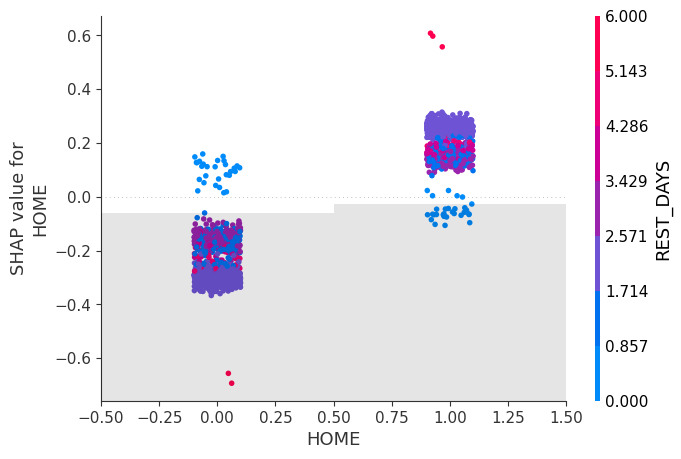

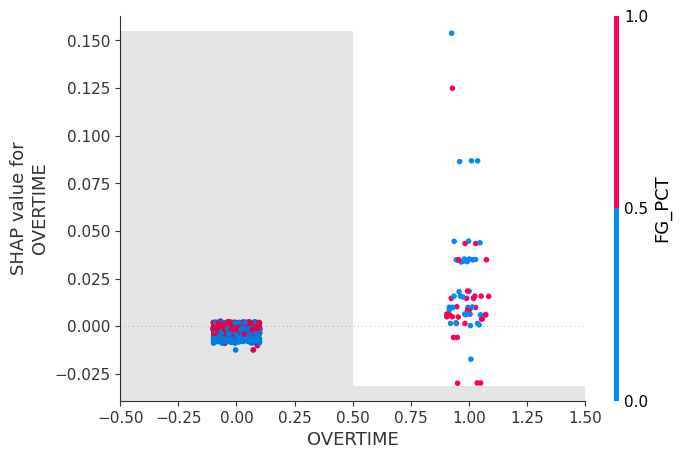

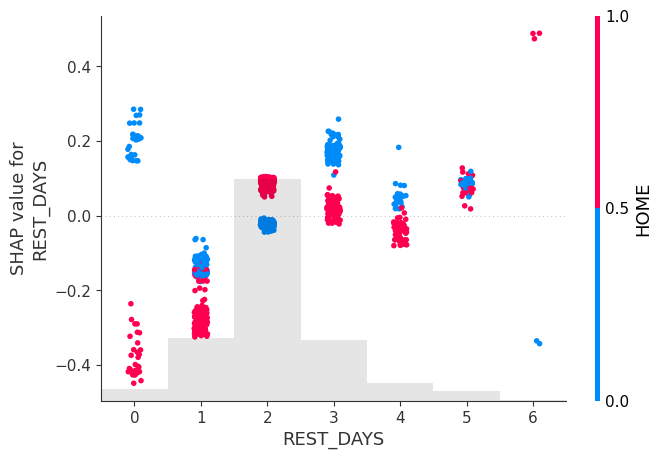

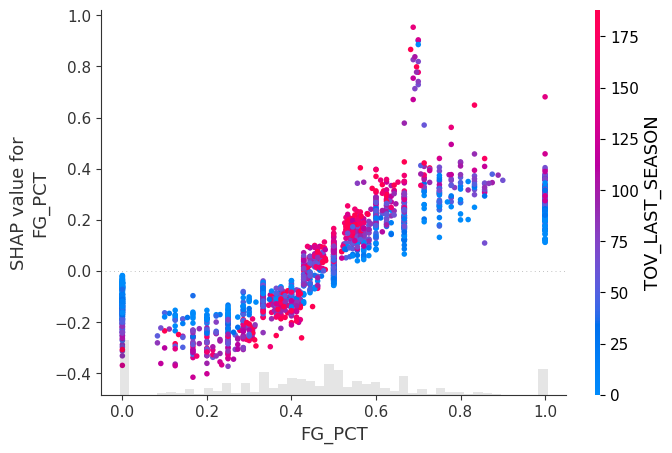

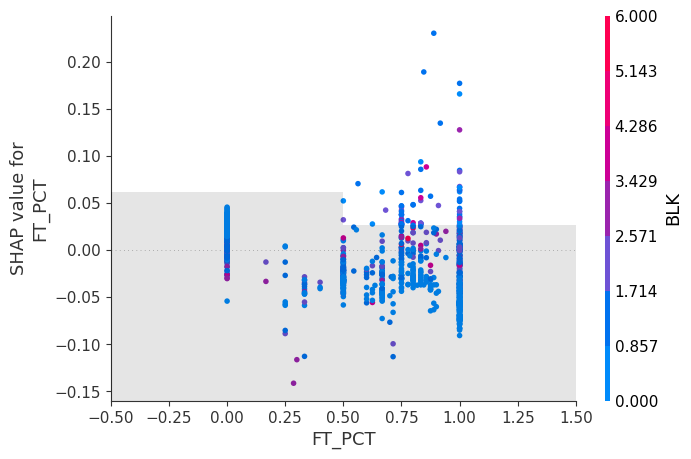

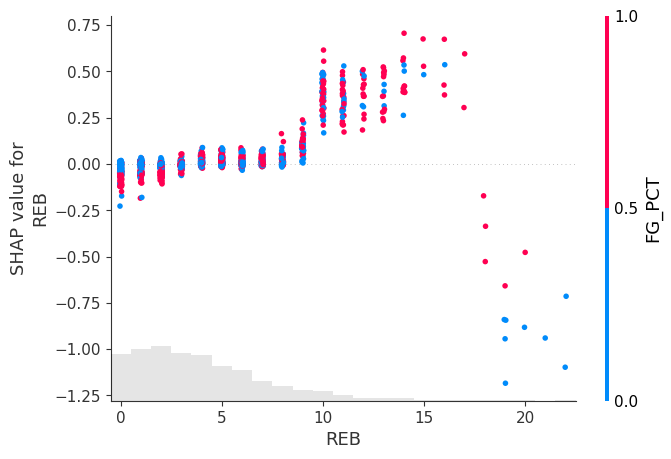

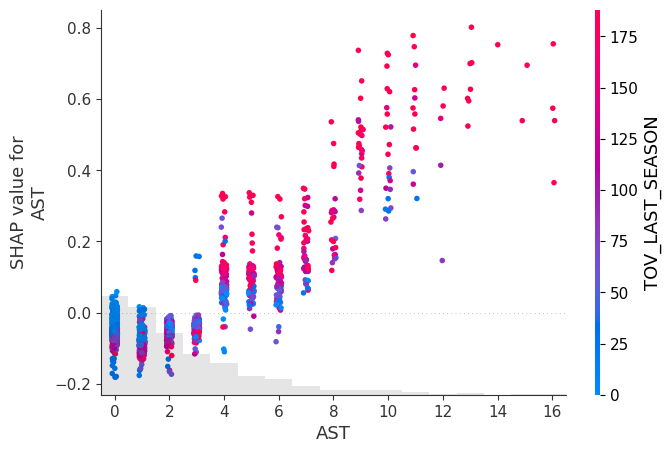

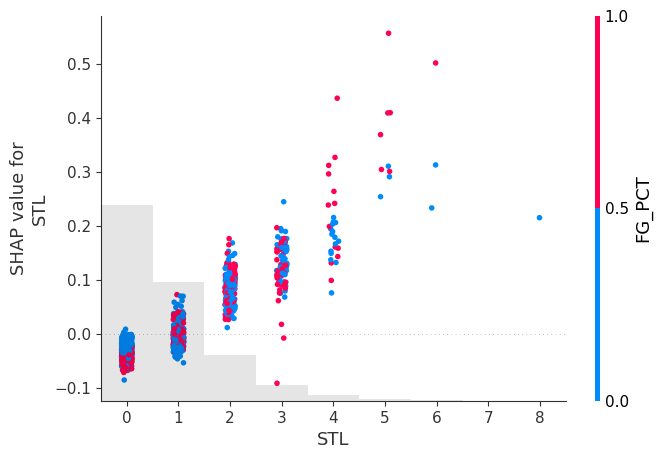

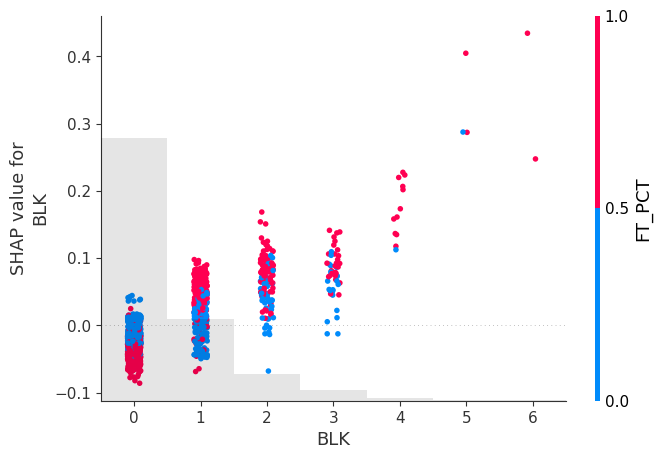

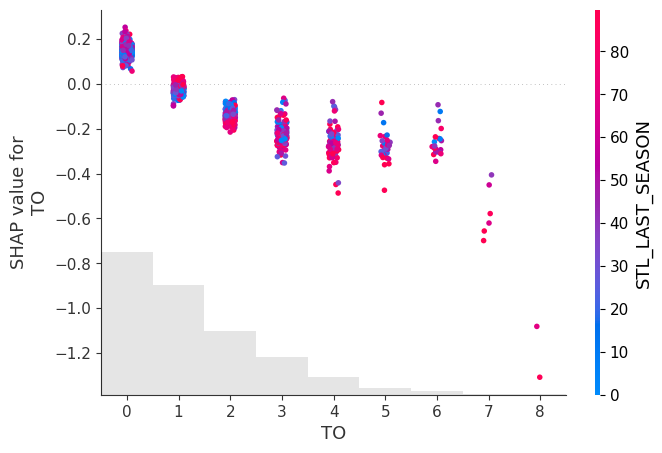

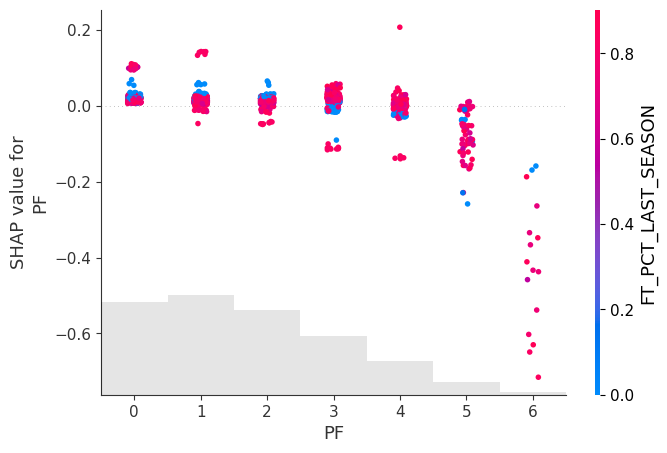

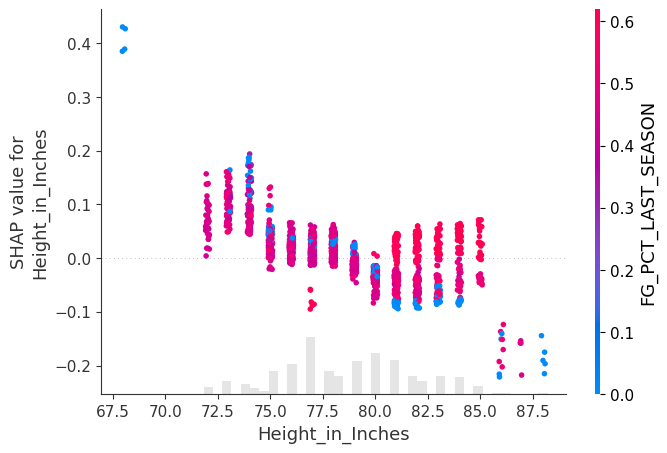

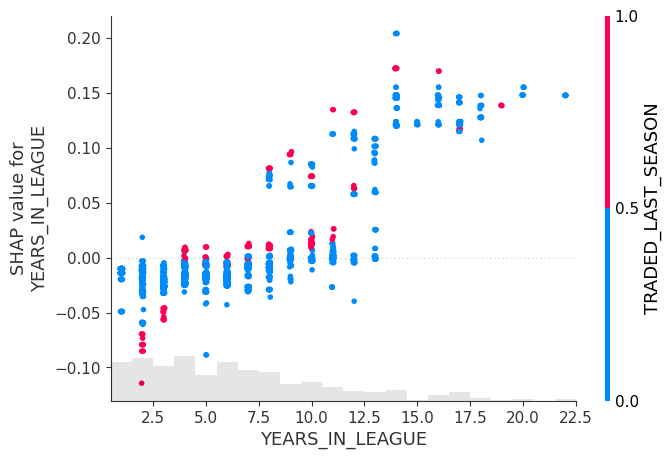

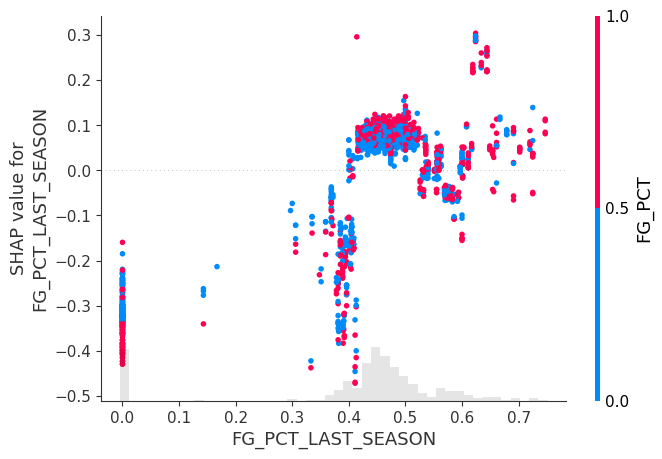

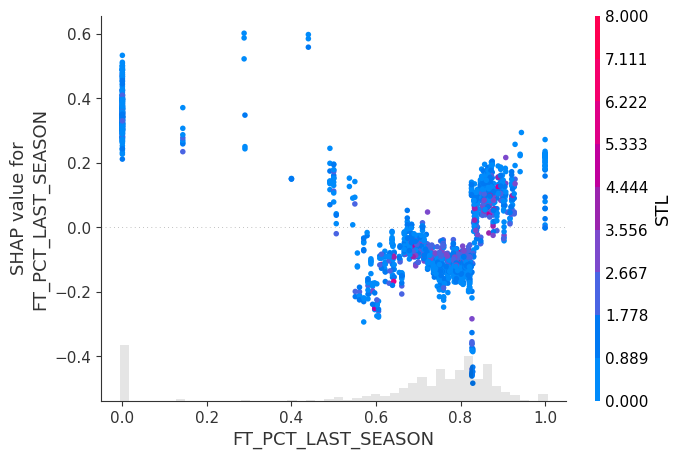

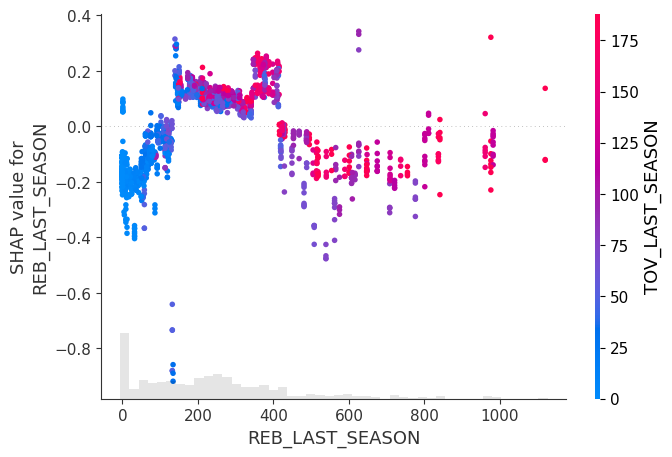

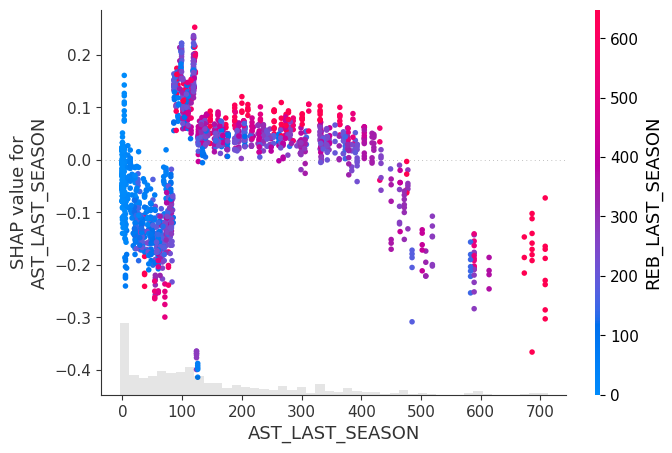

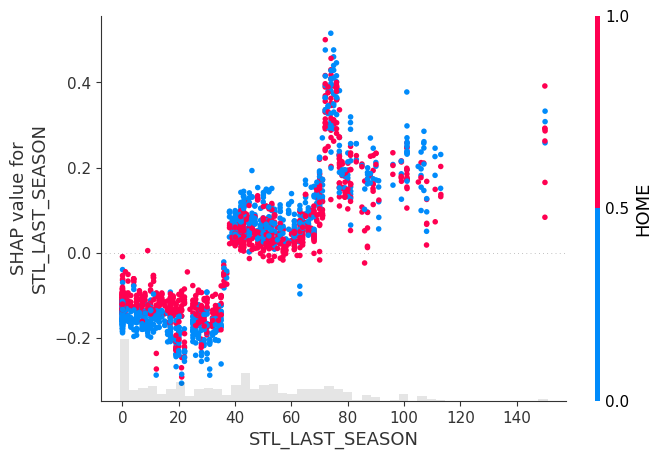

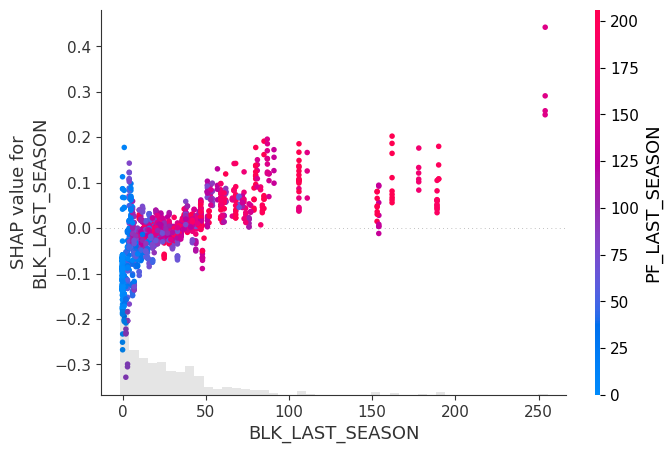

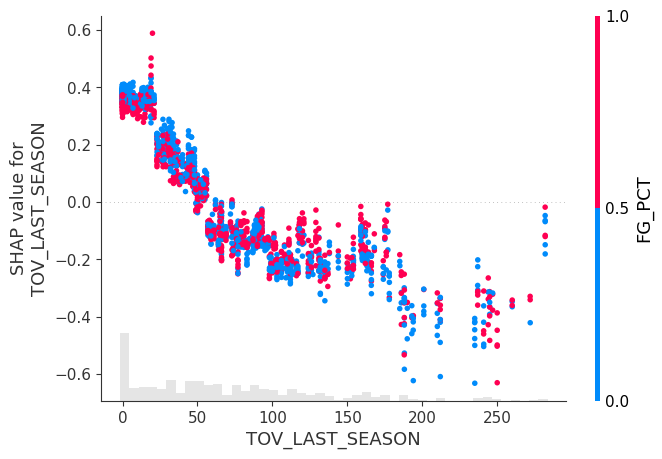

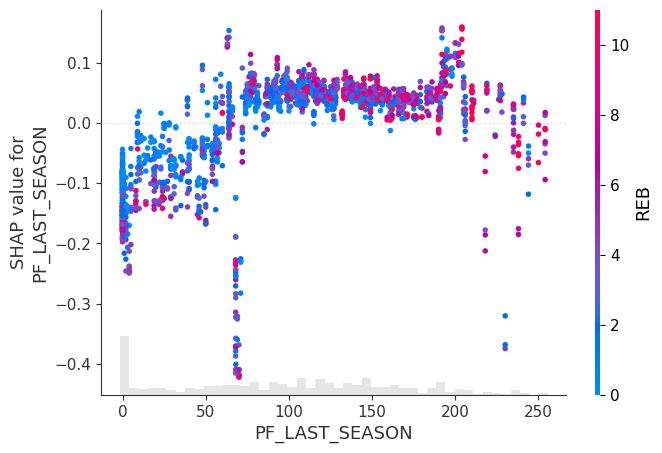

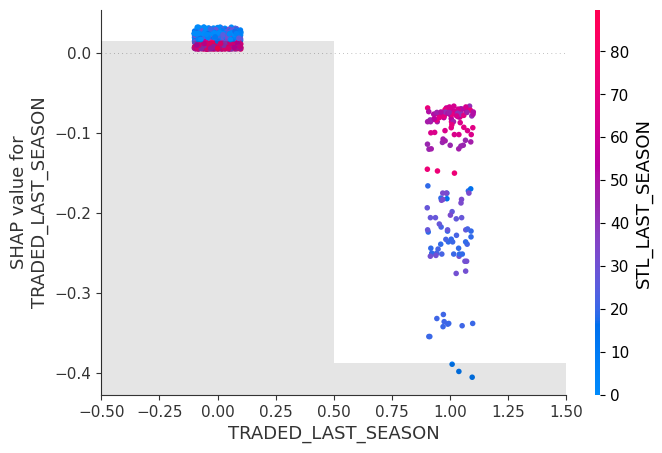

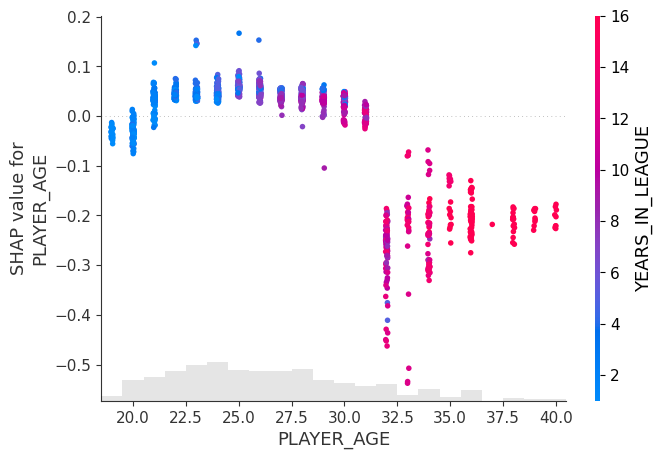

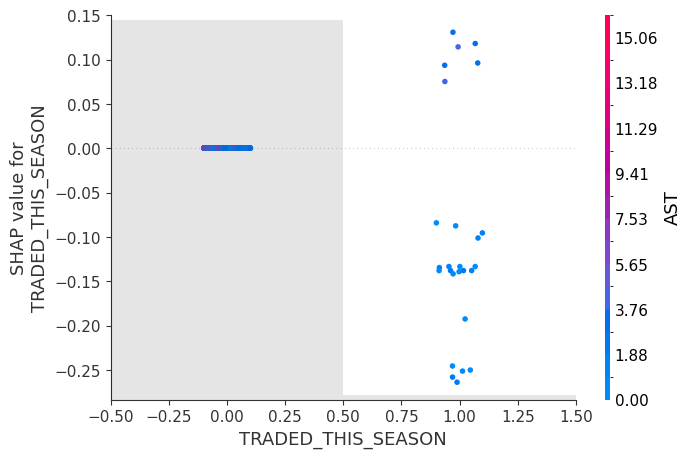

In [ ]:
for name in X_train.columns:
    shap.plots.scatter(shap_values[:, name], color=shap_values)

# all star breaks - 6 days - might be interesting what was the rest day for the opponent
# star players gets more ball and therefore, the turnover
# turnover percentage is correlated to how much you have the ball
# step curry most likely miss 3s because the team lets him to shoot 3s

Seed #2

In [51]:
seed2 = random_numbers[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed2)

In [16]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed2,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [19]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-05 19:19:29,695] A new study created in memory with name: no-name-bfe9f7c5-f8a2-45e0-b744-733b40035ca8


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-05 19:19:31,007] Trial 0 finished with value: 0.5843279709392839 and parameters: {'learning_rate': 0.8862777835830423, 'n_estimators': 32, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.6333552066198}. Best is trial 0 with value: 0.5843279709392839.
[I 2025-02-05 19:19:32,028] Trial 1 finished with value: 0.6076803321224702 and parameters: {'learning_rate': 0.7727336532335641, 'n_estimators': 26, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.17980114984345025}. Best is trial 1 with value: 0.6076803321224702.
[I 2025-02-05 19:19:34,306] Trial 2 finished with value: 0.6087182148417228 and parameters: {'learning_rate': 0.8949314682376794, 'n_estimators': 155, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.6694963396674894}. Best is trial 2 with value: 0.6087182148417228.
[I 2025-02-05 19:19:35,721] Trial 3 finished with value: 0.5926310326933056 and

In [20]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=18, state=1, values=[0.6310326933056565], datetime_start=datetime.datetime(2025, 2, 5, 19, 19, 51, 396391), datetime_complete=datetime.datetime(2025, 2, 5, 19, 19, 52, 254943), params={'learning_rate': 0.23818760768578, 'n_estimators': 23, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.3908239804505385}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=18, value=None)
Best hyperparameters: {'learning_rate': 0.23818760768578, 'n_estimators': 23, 'max

In [52]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.23818760768578,
    n_estimators=23,
    max_depth=6,
    min_samples_split=9,
    min_samples_leaf=2,
    min_impurity_decrease = 0.3908239804505385,
    random_state=seed2)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.631
F1 Score: 0.630
F1 Score - Negative: 0.632
Specificity: 0.641
Sensitivity: 0.620
ROC AUC: 0.631
[[610 339]
 [372 606]]


In [24]:
explainer = shap.Explainer(xg_model, X_train)
shap_values2 = explainer(X_test, check_additivity = False)

In [53]:
seed3 = random_numbers[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed3)

In [26]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed3,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [27]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-05 19:22:39,853] A new study created in memory with name: no-name-2ee5981e-d9a2-4377-9f75-46902bea697d


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-05 19:22:44,464] Trial 0 finished with value: 0.6024909185262065 and parameters: {'learning_rate': 0.2226729920940841, 'n_estimators': 103, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.2601926387467575}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:22:45,878] Trial 1 finished with value: 0.5921120913336793 and parameters: {'learning_rate': 0.4325437135065656, 'n_estimators': 18, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.3137585593057298}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:22:46,811] Trial 2 finished with value: 0.5967825635703166 and parameters: {'learning_rate': 0.8207317678673106, 'n_estimators': 23, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.5102190551499342}. Best is trial 0 with value: 0.6024909185262065.
[I 2025-02-05 19:22:49,751] Trial 3 finished with value: 0.6149455111572393 

In [28]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=12, state=1, values=[0.6222106901920083], datetime_start=datetime.datetime(2025, 2, 5, 19, 23, 2, 421764), datetime_complete=datetime.datetime(2025, 2, 5, 19, 23, 4, 156677), params={'learning_rate': 0.34252917211104633, 'n_estimators': 87, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.4287272166510929}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=12, value=None)
Best hyperparameters: {'learning_rate': 0.34252917211104633, 'n_estimators': 87, 

In [54]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.34252917211104633,
    n_estimators=87,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    min_impurity_decrease = 0.4287272166510929,
    random_state=seed3)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.622
F1 Score: 0.629
F1 Score - Negative: 0.616
Specificity: 0.623
Sensitivity: 0.634
ROC AUC: 0.622
[[583 372]
 [356 616]]


In [30]:
explainer = shap.Explainer(xg_model, X_train)
shap_values3 = explainer(X_test, check_additivity = False)

In [55]:
seed4 = random_numbers[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed4)

In [32]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed4,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [33]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-05 19:26:59,384] A new study created in memory with name: no-name-91b3b6ce-2625-4f7a-a225-ac1b5867bf41


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-05 19:27:00,507] Trial 0 finished with value: 0.6128697457187338 and parameters: {'learning_rate': 0.5557293717979505, 'n_estimators': 41, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.6659916335753255}. Best is trial 0 with value: 0.6128697457187338.
[I 2025-02-05 19:27:01,381] Trial 1 finished with value: 0.5947067981318112 and parameters: {'learning_rate': 0.4296322532200868, 'n_estimators': 69, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.5696110633724405}. Best is trial 0 with value: 0.6128697457187338.
[I 2025-02-05 19:27:03,229] Trial 2 finished with value: 0.628956927867151 and parameters: {'learning_rate': 0.14955895972189037, 'n_estimators': 37, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.20354587453229034}. Best is trial 2 with value: 0.628956927867151.
[I 2025-02-05 19:27:04,739] Trial 3 finished with value: 0.623248572911261 and

In [34]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=19, state=1, values=[0.6320705760249092], datetime_start=datetime.datetime(2025, 2, 5, 19, 27, 25, 201367), datetime_complete=datetime.datetime(2025, 2, 5, 19, 27, 26, 489174), params={'learning_rate': 0.16141899621221037, 'n_estimators': 64, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.47464633069977435}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=19, value=None)
Best hyperparameters: {'learning_rate': 0.16141899621221037, 'n_estimators': 6

In [56]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.16141899621221037,
    n_estimators=64,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=5,
    min_impurity_decrease = 0.47464633069977435,
    random_state=seed4)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.632
F1 Score: 0.627
F1 Score - Negative: 0.637
Specificity: 0.645
Sensitivity: 0.610
ROC AUC: 0.632
[[623 328]
 [381 595]]


In [36]:
explainer = shap.Explainer(xg_model, X_train)
shap_values4 = explainer(X_test, check_additivity = False)

In [57]:
seed5 = random_numbers[5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed5)

In [38]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed5,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [39]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-05 19:30:14,620] A new study created in memory with name: no-name-aea878ed-2840-4aea-a717-e84429fbba33


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-05 19:30:15,810] Trial 0 finished with value: 0.6030098598858329 and parameters: {'learning_rate': 0.89457973423512, 'n_estimators': 95, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.8858739331826783}. Best is trial 0 with value: 0.6030098598858329.
[I 2025-02-05 19:30:16,760] Trial 1 finished with value: 0.6248053969901401 and parameters: {'learning_rate': 0.6456789646917802, 'n_estimators': 37, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.38015247763167326}. Best is trial 1 with value: 0.6248053969901401.
[I 2025-02-05 19:30:17,209] Trial 2 finished with value: 0.6056045666839647 and parameters: {'learning_rate': 0.8973292807112444, 'n_estimators': 12, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.4806415884098636}. Best is trial 1 with value: 0.6248053969901401.
[I 2025-02-05 19:30:18,993] Trial 3 finished with value: 0.6268811624286456 and 

In [40]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=3, state=1, values=[0.6268811624286456], datetime_start=datetime.datetime(2025, 2, 5, 19, 30, 17, 213500), datetime_complete=datetime.datetime(2025, 2, 5, 19, 30, 18, 993361), params={'learning_rate': 0.604204255231792, 'n_estimators': 73, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.4210499539005069}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=3, value=None)
Best hyperparameters: {'learning_rate': 0.604204255231792, 'n_estimators': 73, 'max

In [58]:
xg_model = GradientBoostingClassifier(
    learning_rate = 0.604204255231792,
    n_estimators=73,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=8,
    min_impurity_decrease = 0.4210499539005069,
    random_state=seed5)
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.627
F1 Score: 0.617
F1 Score - Negative: 0.636
Specificity: 0.626
Sensitivity: 0.609
ROC AUC: 0.627
[[628 347]
 [372 580]]


In [42]:
explainer = shap.Explainer(xg_model, X_train)
shap_values5 = explainer(X_test, check_additivity = False)